In [1]:
import xarray
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy
import dask
import warnings

In [2]:
print("ola")

ola


In [3]:
#define which datasets to import
# pairs of same inner and outer steps changing the grid from fine to coarse

models = [
    {
        "name" : "1080x256_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "1080x256",
        "plot_style" : "--c"
    },

    {
        "name" : "256x64_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "256x64",
        "plot_style" : "--k"
    },
    
    {
        "name" : "64_8_150_seconds_inner_1",
        "kill_factor" : 1,
        "legend" : "64x8"
    }
    
]

rows = len(models)
columns = 4

In [4]:
## calculate and plot vorticity
def vorticity(ds):
  return (ds.v.differentiate('x') - ds.u.differentiate('y')).rename('vorticity')

In [9]:
def plot_var(models,rows,columns,var,figsize=(15,8)):
    fig, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.1)


    axs = axs.ravel()
    
    axis = 0
    for model in models:
        model_name = model['name']
        kill_factor = model['kill_factor']
        label = model['legend']
        ds = xarray.open_dataset(f'./datasets/'+ model_name +'.nc', chunks={'time': '100MB'})
        ds = ds.isel(sample = 0)
        outer_steps = len(ds.time)
        
        total_sim_time = max(ds.time.values)*kill_factor
        seconds_warm_up = 15
        warm_up = int(seconds_warm_up * (outer_steps/total_sim_time)) #this allows us to start plotting after a set number of seconds
        
#         warm_up = int(outer_steps*kill_factor//(columns-1))-1 #0
        
        
        
        
        if var == 'vorticity':
            vort = ds.pipe(vorticity)
        
        for time_slice in range(warm_up,int(np.floor(outer_steps*kill_factor)),int((outer_steps*kill_factor-warm_up)//(columns-1)-1)):
            
            if var == 'u':
                field_var = ds.u[time_slice]
            elif var == 'v':
                field_var = ds.v[time_slice]
            elif var == 'vorticity':
                field_var = vort[time_slice]
            
            im = xarray.plot.pcolormesh(field_var, 'x', 'y',add_colorbar = False,cmap=seaborn.cm.rocket,ax = axs[axis],robust=True);
            axs[axis].title.set_text('time: ' + "{:.1f}".format(ds.time[time_slice]))
#             axs[axis].axis('off')
            
    
            ## Plots colorbar at the last subplot for each model
#             if (axis+1) % columns == 0:
#                 cbar = fig.colorbar(im, ax=axs[axis], shrink=1)
            

            #remove vorticity from y axis of each subplot
            axis += 1
    
        print(max(field_var.values.flatten()))
    for i in range(len(models)):
        label = models[i]['legend']
        axs[i*columns].set_ylabel(label, rotation=90, size='large')
        
    
    fig.tight_layout()
    
    ## Plots general colorbar 
    cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8)
    cbar.set_label(var, rotation=0, size='large')
    
        
    
    plt.show()
    


0.9466126
0.75140846
0.42868936


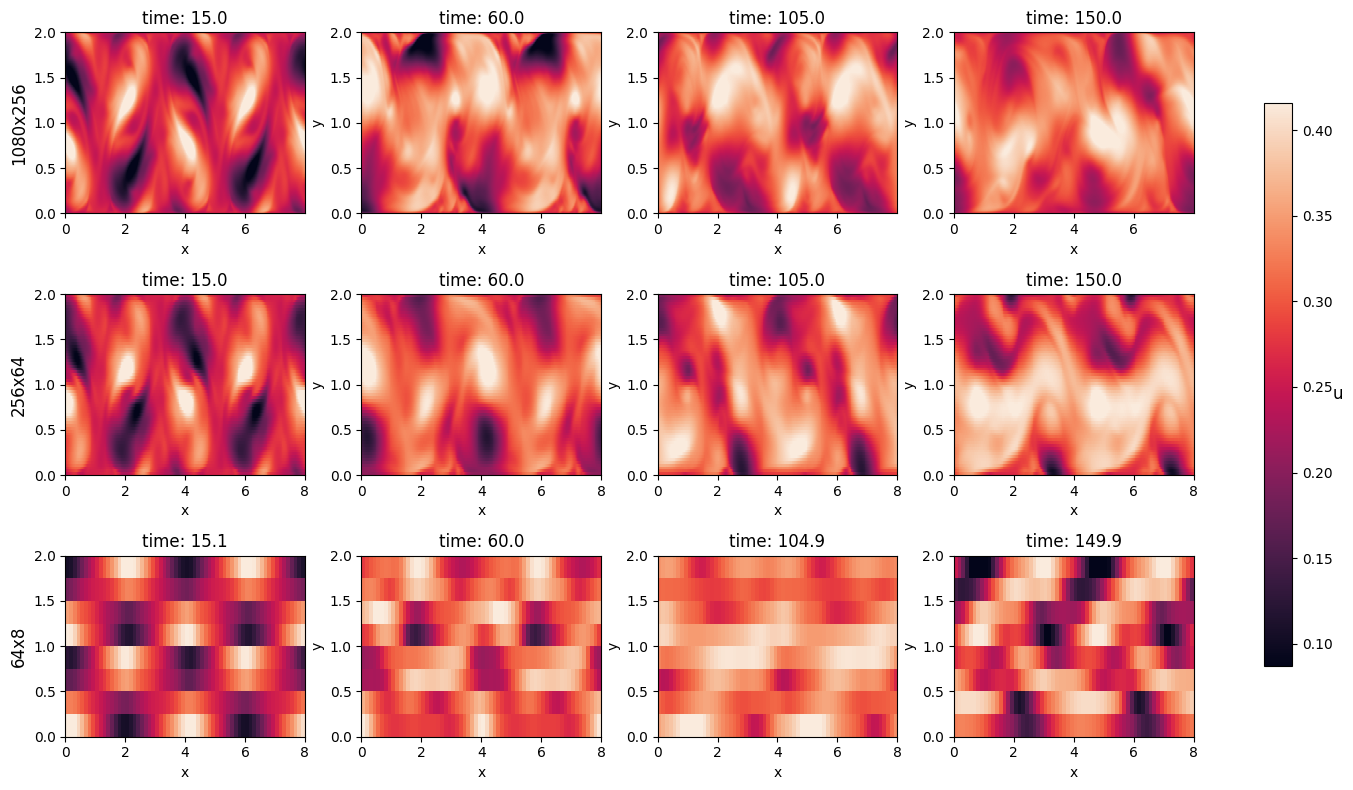

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,columns,'u')

0.58879554
0.476897
0.14762828


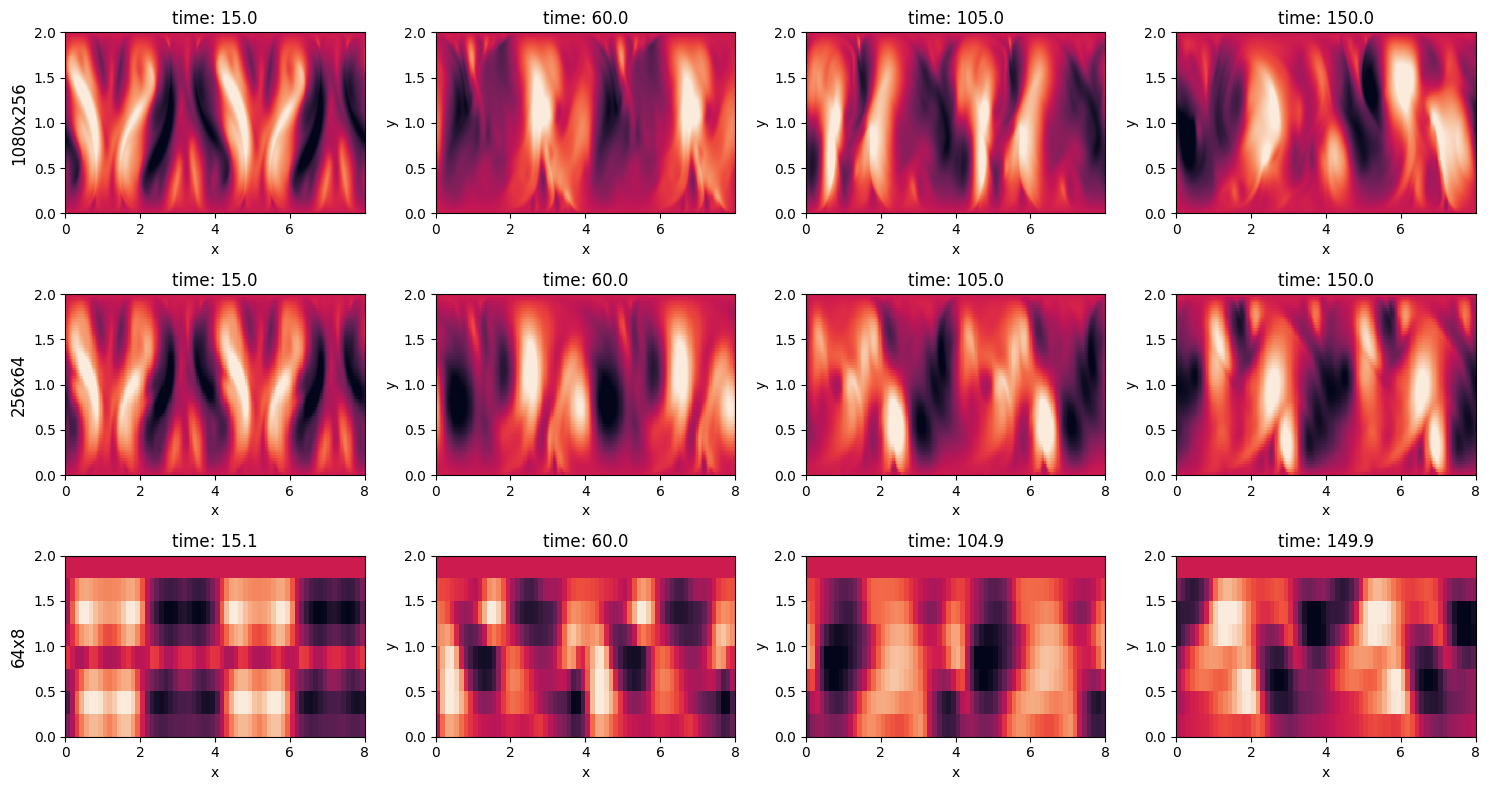

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,columns,'v')

28.680563
8.609112
1.096986


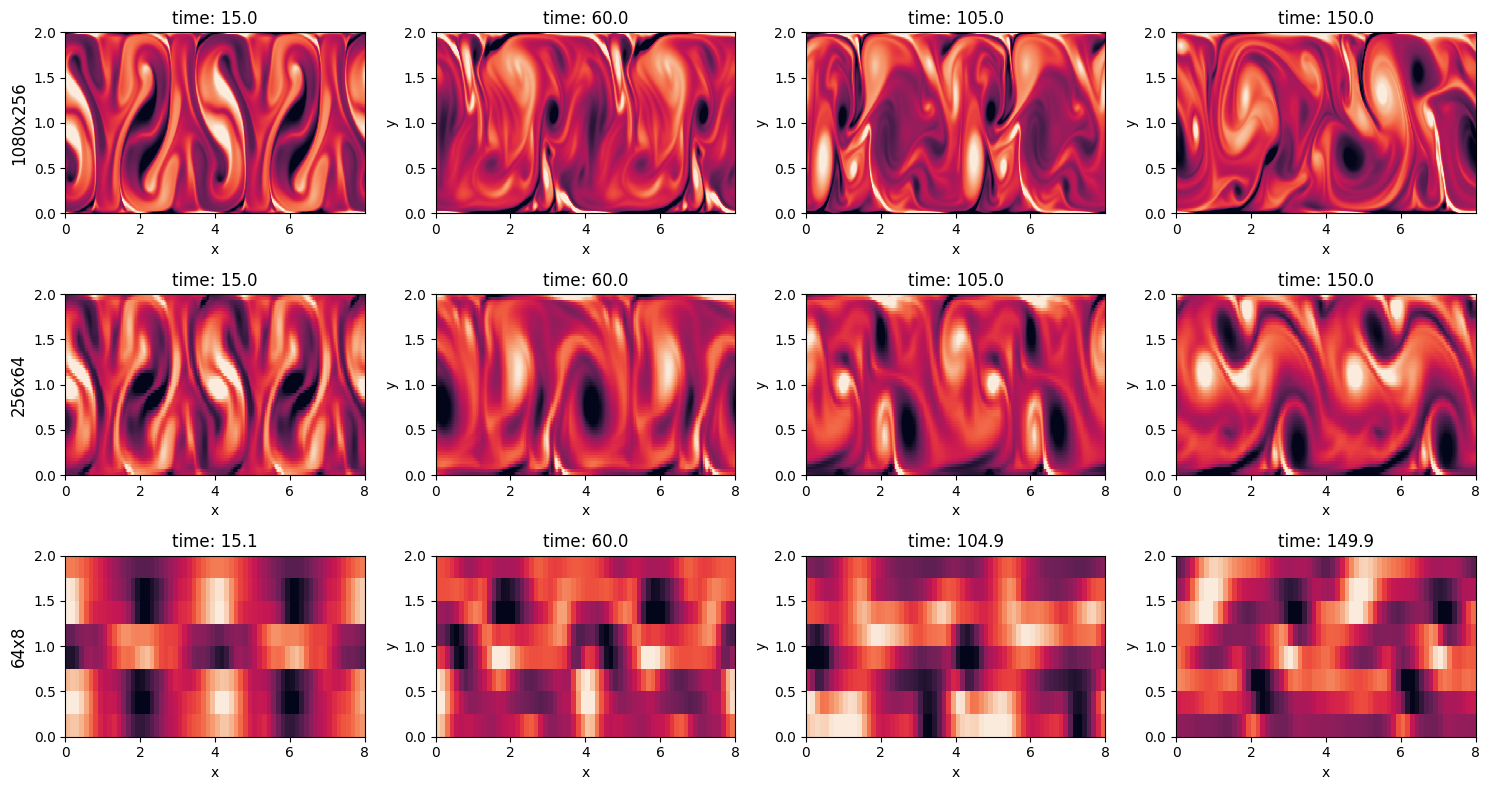

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,4,'vorticity')